In [1]:
import pandas as pd
ev_data=pd.read_csv(r"C:\Users\SATYAM\OneDrive\Desktop\DA Projects\EV_Data\Electric_Vehicle_Population_Data.csv")
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [5]:
ev_data=ev_data.dropna()

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

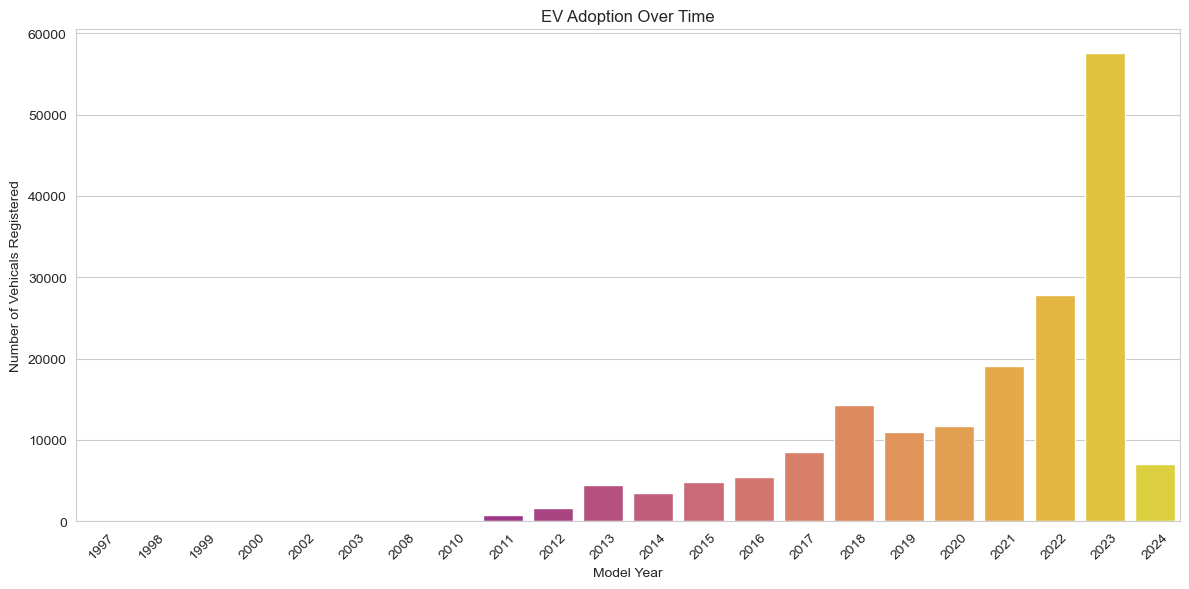

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#EV Adoption Over Time
plt.figure(figsize=(12,6))
ev_adoption_by_year=ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index,y=ev_adoption_by_year.values,palette="plasma")
plt.title("EV Adoption Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicals Registered")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

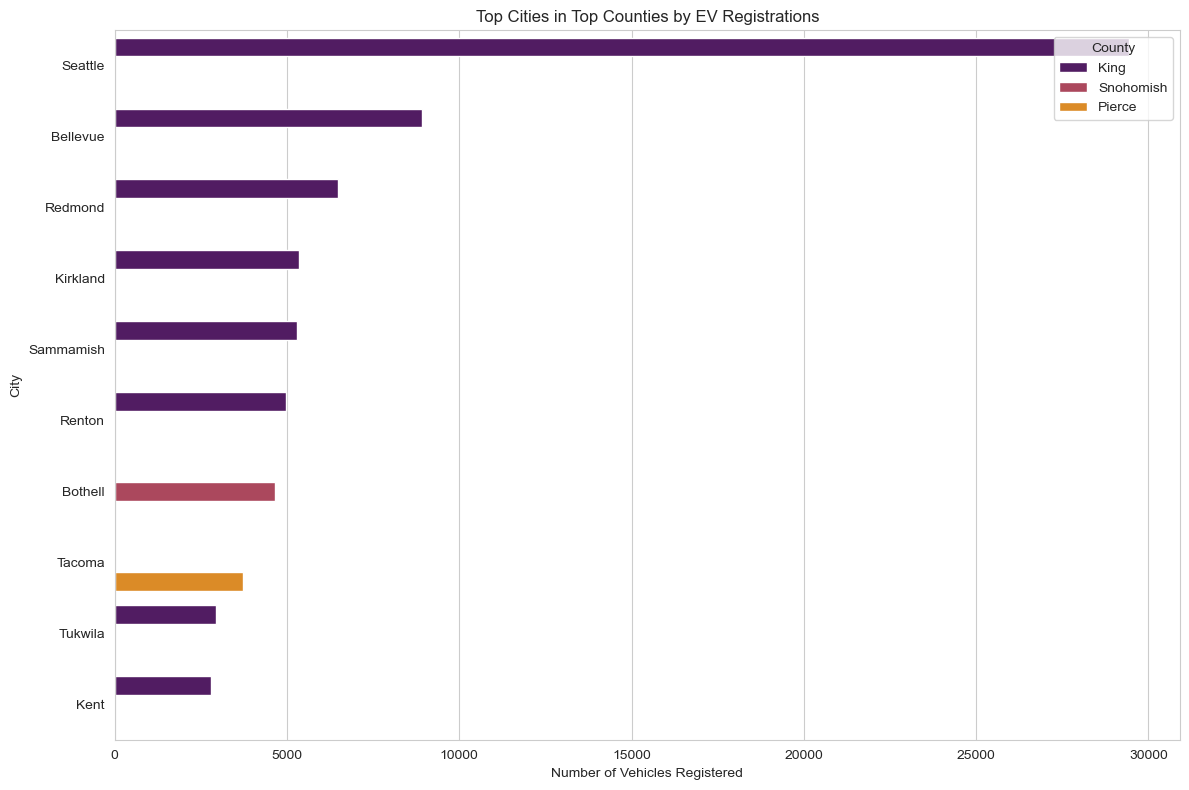

In [11]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="inferno")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

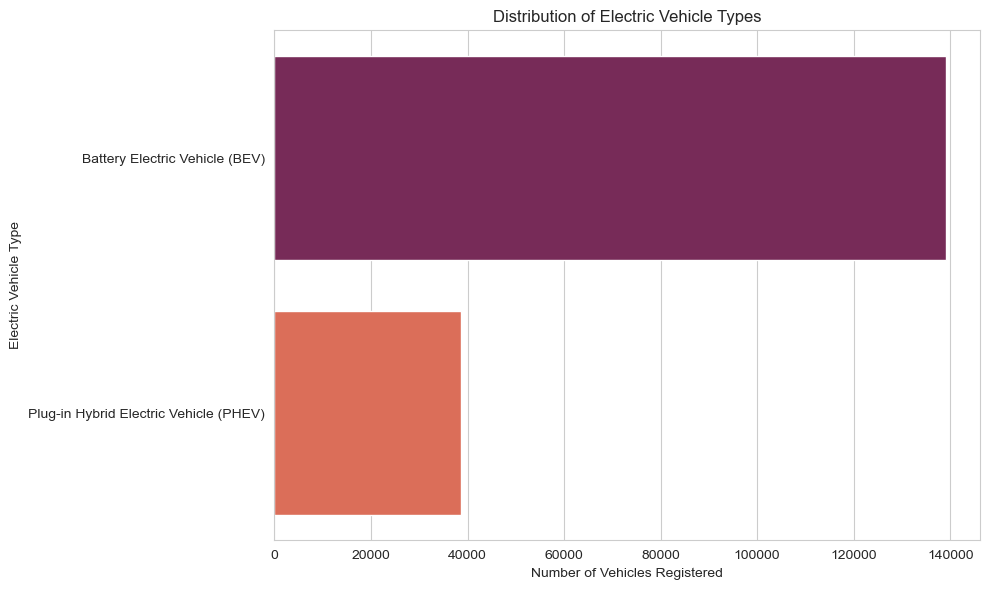

In [12]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution=ev_data["Electric Vehicle Type"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

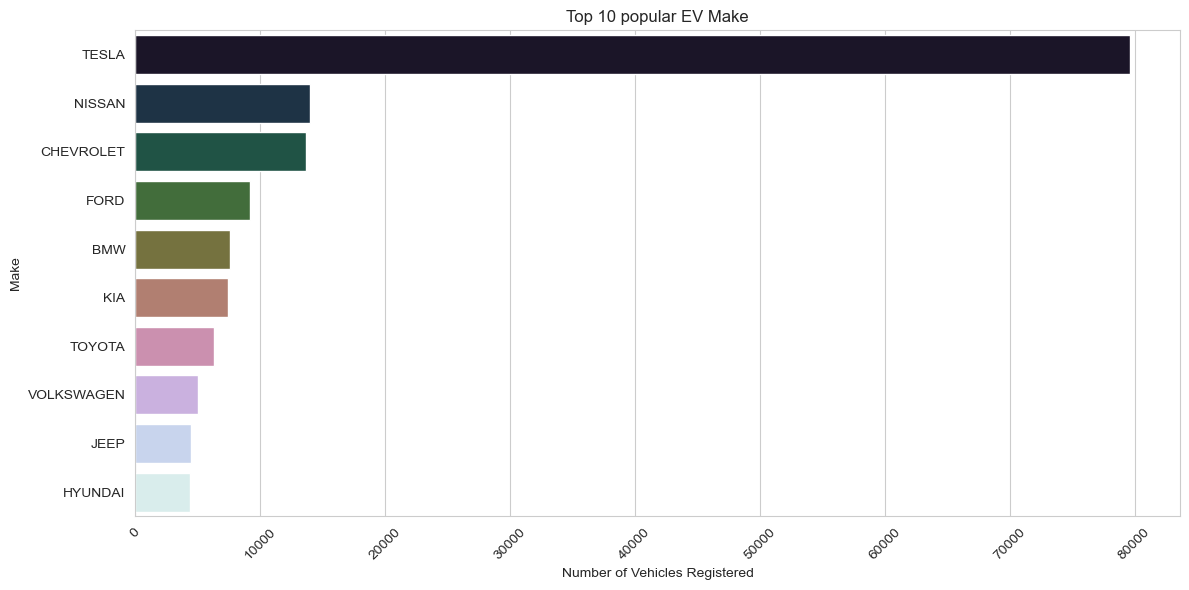

In [13]:
# analyzing the popularity of EV manufacturers
ev_make_distribution=ev_data['Make'].value_counts().head(10)# Limiting to top 10 for clarity

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette="cubehelix")
plt.title("Top 10 popular EV Make")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

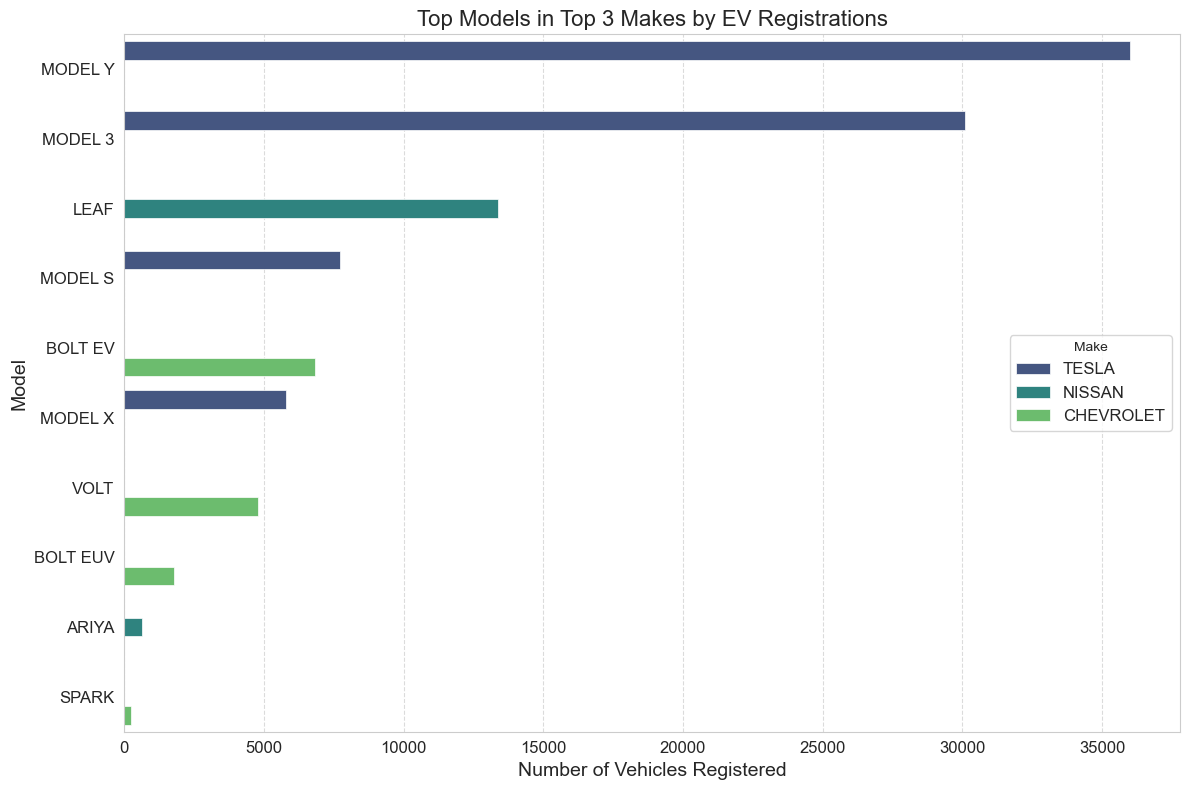

In [14]:
# selecting the top 3 manufacturers based on the number of vehicles register
top_3_make=ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_make_data=ev_data[ev_data['Make'].isin(top_3_make)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_make=top_make_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models=ev_model_distribution_top_make.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis", linewidth=0.5)
plt.title('Top Models in Top 3 Makes by EV Registrations', fontsize=16)
plt.xlabel('Number of Vehicles Registered', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xticks(fontsize=12)  # Adjust font size of x-axis labels
plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
plt.legend(title='Make', loc='center right', fontsize=12)  # Adjust legend position and font size
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


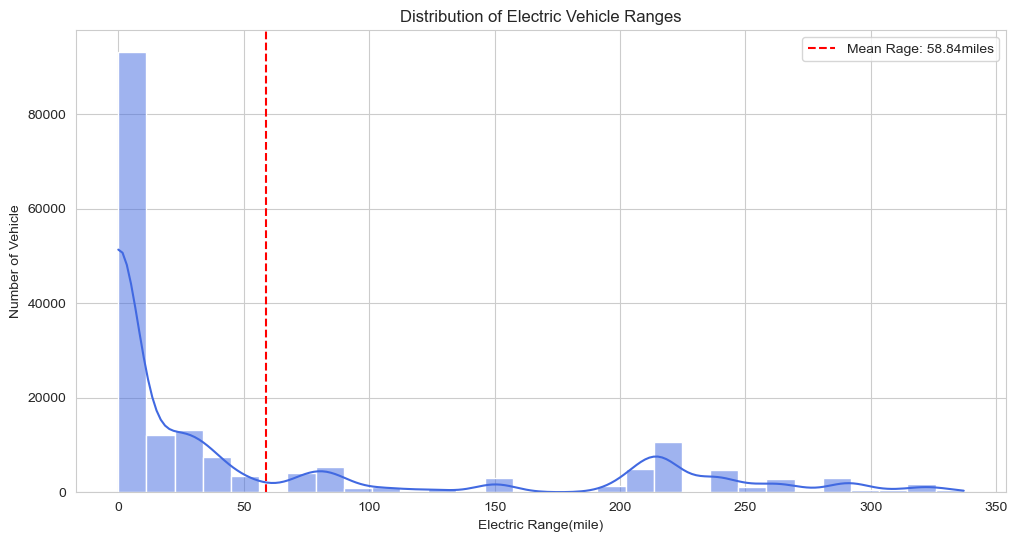

In [15]:
# analyzing the distribution of electric range
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'],bins=30,kde=True,color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range(mile)')
plt.ylabel('Number of Vehicle')
plt.axvline(ev_data['Electric Range'].mean(),color='red',linestyle='--',label=f'Mean Rage: {ev_data["Electric Range"].mean():.2f}miles')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


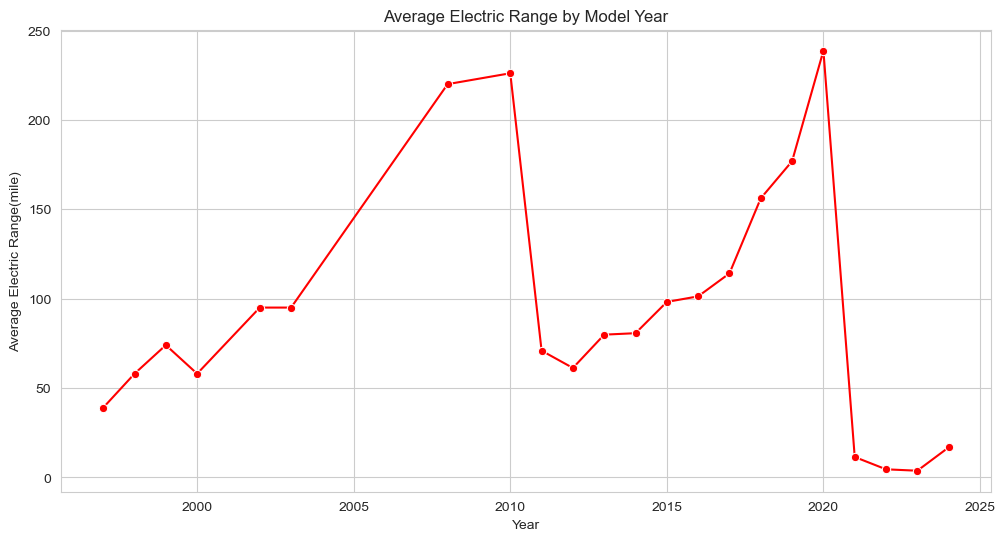

In [16]:
# calculating the average electric range by model year
avg_range_by_year=ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year',y='Electric Range',data=avg_range_by_year,marker="o",color="red")
plt.title("Average Electric Range by Model Year")
plt.xlabel("Year")
plt.ylabel("Average Electric Range(mile)")
plt.grid(True)
plt.show()

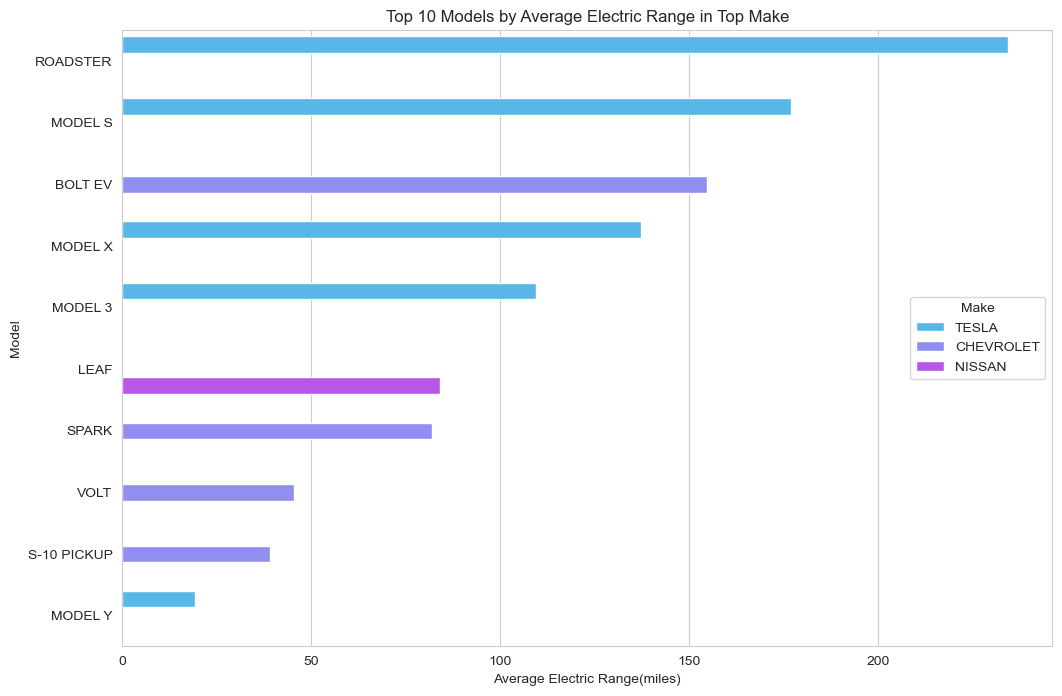

In [17]:
average_range_by_mode=top_make_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_model_range=average_range_by_mode.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Electric Range',y='Model',hue='Make',data=top_model_range,palette="cool")
plt.title("Top 10 Models by Average Electric Range in Top Make")
plt.xlabel("Average Electric Range(miles)")
plt.ylabel("Model")
plt.legend(title="Make",loc="center right")
plt.show()

In [18]:
# calculate the number of EVs registered each year
ev_registration_counts=ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64

In [19]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years=ev_registration_counts[ev_registration_counts.index<=2023]

# define a function for exponential growth to fit the data
def exp_growth(x,a,b):
    return a*np.exp(b*x)

# prepare the data for curve fitting
x_data=filtered_years.index - filtered_years.index.min()
y_data=filtered_years.values

# fit the data to the exponential growth function
params,covariance=curve_fit(exp_growth,x_data,y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years=np.arange(2024,2024+6)-filtered_years.index.min()
forecast_values=exp_growth(forecast_years,*params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs=dict(zip(forecast_years + filtered_years.index.min(),forecast_values))

print(forecasted_evs)

{2024: 79092.26358070358, 2025: 119565.00850312428, 2026: 180748.2882793602, 2027: 273240.0066284026, 2028: 413061.179903938, 2029: 624431.02841697}


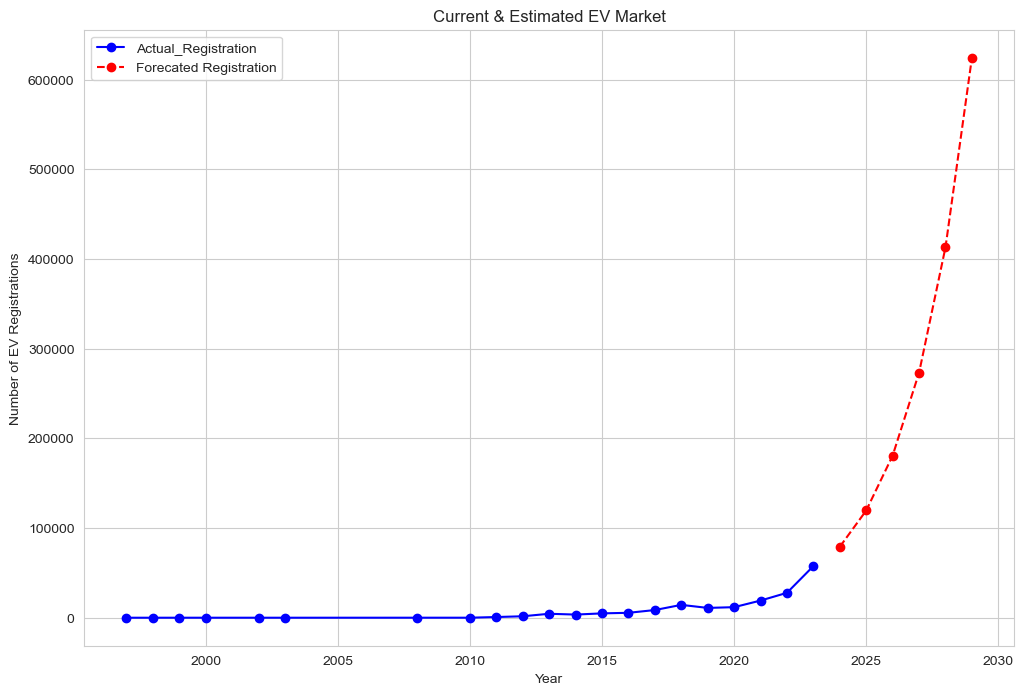

In [23]:
# prepare data for plotting
years=np.arange(filtered_years.index.min(),2029+1)
actual_years=filtered_years.index
forecast_years_full=np.arange(2024,2029+1)

# actual and forecasted values
actual_values=filtered_years.values
forecasted_values_full=[forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12,8))
plt.plot(actual_years,actual_values,'bo-' , label='Actual_Registration')
plt.plot(forecast_years_full,forecasted_values_full,"ro--",label="Forecated Registration")

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()